In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('/home/quantum/Documents/iltpe/SiO2Damon1973.txt', 'r') as f:
    data = f.readlines()
data = [d.split('\t') for d in data]
data = pd.DataFrame(data[1:], columns=['T', 'k'])
data['k'] = data['k'].str.replace('\n', '')
for c in data.columns:
    data[c] = data[c].astype('float')

In [3]:
data['T_log'] = np.log(data['T'])
data['k_log'] = np.log(data['k'])

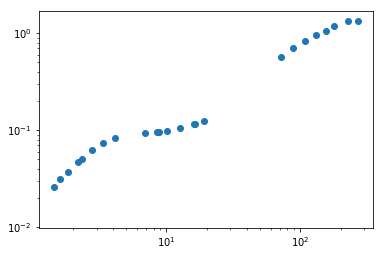

In [4]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(data['T'], data['k'])
ax.set_yscale('log')
ax.set_xscale('log')

In [5]:
z = np.polyfit(data['T_log'], data['k_log'], 6)
p = np.poly1d(z)
xp = np.linspace(0, 5, 500)
ap_df = pd.DataFrame({'x':xp})
ap_df['y'] = [p(x) for x in xp]

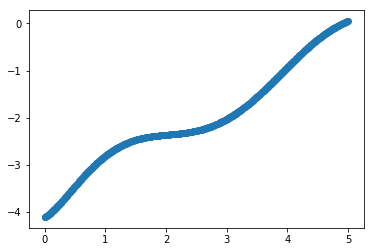

In [6]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(ap_df['x'], ap_df['y'])
# ax.set_yscale('log')
# ax.set_xscale('log')

In [7]:
ap_df.head()

,x,y
0,0.00000,-4.109610
1,0.01002,-4.100901
2,0.02004,-4.091864
3,0.03006,-4.082510
4,0.04008,-4.072849


In [8]:
def k_func(T, c1, c2, c3, c4, n):
    k1 = (c1*T**n*c2)/(c1*T**n+c2) 
    k2 = c3*np.exp(-c4/T)
    return k1+k2

def loss_k(params):
    c1 = params['c1']  
    c2 = params['c2'] 
    c3 = params['c3'] 
    c4 = params['c4']
    n = params['n']
    k_fit = [k_func(t, c1, c2, c3, c4, n) for t in T]
    return np.mean((k_fit - k)**2)

In [9]:
ap_df = ap_df[ap_df['x']>0]

In [10]:
T = np.exp(ap_df['x'])
k = np.exp(ap_df['y'])

In [11]:
test_params = {
    'c1':0.01,
    'c2':15,
    'c3':0.01,
    'c4':5,
    'n':2
}
loss_k(test_params)

36.855323908850146

In [ ]:
from hyperopt import fmin, tpe, hp
space = {'c1': hp.uniform('c1', 0.01, 0.1),
        'c2': hp.uniform('c2', 0.0001, 15),
        'c3': hp.uniform('c3', 0.1, 100),
        'c4': hp.uniform('c4', 5, 250),
        'n': hp.uniform('n', 1.7, 2)}

best = fmin(fn=loss_k,
    space=space,
    algo=tpe.suggest,
    max_evals=5000)
print(best)


 34%|███▍      | 1712/5000 [00:43<02:15, 24.34it/s, best loss: 0.0019013605054698697]

In [ ]:
best

In [ ]:
c1 = best["c1"]
c2 = best["c2"]
c3 = best["c3"]
c4 = best["c4"]
n = best["n"]
k1_fitted = k_func(T, c1, c2, c3, c4, n)
k_ethalon = k_func(T, 0.4, 0.11, 1.8, 15, 1.8)

In [ ]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(data['T'], data['k'])
ax.plot(T, k)
ax.plot(T, k1_fitted)
ax.plot(T, k_ethalon)
ax.set_yscale('log')
ax.set_xscale('log')

In [17]:
z = np.polyfit(data['T_log'], data['k_log'], 6)
p = np.poly1d(z)
xp = np.linspace(0, 5, 100)
ap_df = pd.DataFrame({'x':xp})